# Nama : Budi Setiawan
# NIM : G1B017009

2. Pilih satu sinyal jantung, bunyi jantung atau EEG dan lainnya dan aplikasikan filter Butterworth.

refrensi rumus ada <a href="https://daring.unram.ac.id/mod/resource/view.php?id=7499">disini</a>

In [1]:
%matplotlib inline
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
import scipy.signal as signal

In [4]:
def get_data(filename,fs,orde,fc):
    annots = loadmat(filename)
    data_signal = annots['val'][0]
    filter_butterworth(data_signal,fs,orde,fc)

def filter_butterworth(data_signal,fs,orde,fc):
    t = np.arange(0,3600)
    b, a = signal.butter(orde, fc, 'lowpass', fs=fs, analog=False)
    zi = signal.lfilter_zi(b, a)
    yn, _ = signal.lfilter(b, a, data_signal,zi=zi*data_signal[0])
    zn = signal.filtfilt(b, a, data_signal)
    ploter(data_signal,zn,yn,t)

def ploter(data_signal,zn,yn,t):
    plt.title("Filter Digital Butterworth")
    plt.plot(data_signal, 'r', alpha=0.75)
    plt.plot(t, yn, 'b--')
    plt.plot(t, zn, 'k')
    plt.xlabel("Time")
    plt.ylabel("Amplitudo Signal")
    plt.legend(('noisy signal', 'lfilter','filtfilt'), loc='best')
    plt.show()
    

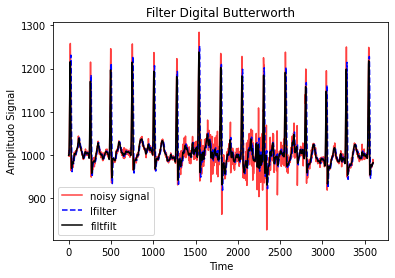

In [6]:
get_data("200m (2).mat",fs=100,orde=3,fc=5)